In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('region25.csv')

In [15]:
data=data.drop(index = list(range(data.shape[0] // 16, data.shape[0])))

In [16]:
data.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Fiat,124 Spider,Открытый,Синий,Бензин,NaN,8000.0,Автомат,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/fiat/124_spider/47...,Только сегодня с таможни забрали Как новый! Кр...,2022-08-20 04:00:00
1,BMW,i3,Хэтчбек 5 дв.,Черный,Электро,NaN,12000.0,Автомат,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/bmw/i3/47958301.html,"Электричка +двс V-600cc ,как новая BMW i3 с ге...",2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,Джип 5 дв.,Бордовый,Бензин,2015.0,57000.0,АКПП,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/gle_...,Отличное состояние автомобиля. Комплектация «G...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,Джип 5 дв.,Черный,Бензин,2002.0,200000.0,АКПП,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/g-cl...,Продам правильный гелик. Лучшая машина. Полнос...,2022-08-20 04:00:00
4,Audi,Q7,Джип 5 дв.,Белый,Бензин,NaN,67000.0,Автомат,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/audi/q7/46498184.html,Audi Q7 II S line (252л.с.) 4WD Внедорожник 5 ...,2022-08-20 04:00:00


In [17]:
data = data.dropna(axis=1, how='any')
data

,brand,name,bodyType,price,date,location,link,parse_date
0,Fiat,124 Spider,Открытый,1830000,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,Хэтчбек 5 дв.,1830000,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,Джип 5 дв.,4600000,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,Джип 5 дв.,2999999,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,Джип 5 дв.,3300000,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00
...,...,...,...,...,...,...,...,...
5905,Toyota,Corolla,Седан,168000,2022-08-19 00:00:00,Партизанск,https://partizansk.drom.ru/toyota/corolla/4794...,2022-08-20 06:00:00
5906,Lexus,RX350,Джип 5 дв.,1200000,2022-08-19 00:00:00,Владивосток,https://vladivostok.drom.ru/lexus/rx350/474271...,2022-08-20 06:00:00
5907,Honda,Stepwgn,Минивэн,1630000,2022-08-19 00:00:00,Владивосток,https://vladivostok.drom.ru/honda/stepwgn/4794...,2022-08-20 06:00:00
5908,Toyota,RAV4,Джип 5 дв.,2800000,2022-08-19 00:00:00,Владивосток,https://vladivostok.drom.ru/toyota/rav4/479498...,2022-08-20 06:00:00


In [18]:

for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

brand - object - 0
name - object - 0
bodyType - object - 0
price - int64 - 0
date - object - 0
location - object - 0
link - object - 0
parse_date - object - 0


In [19]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

brand
name
bodyType
date
location
link
parse_date


In [20]:
le1 = LabelEncoder()
data['brand'] = le1.fit_transform(data['brand']);

In [21]:
le2 = LabelEncoder()
data['name'] = le2.fit_transform(data['name']);

In [22]:
le3 = LabelEncoder()
data['bodyType'] = le3.fit_transform(data['bodyType']);

In [23]:
le4 = LabelEncoder()
data['date'] = le4.fit_transform(data['date']);

In [24]:
le5 = LabelEncoder()
data['location'] = le5.fit_transform(data['location']);

In [25]:
le6 = LabelEncoder()
data['link'] = le6.fit_transform(data['link']);

In [26]:
le7 = LabelEncoder()
data['parse_date'] = le7.fit_transform(data['parse_date']);

In [27]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

In [29]:

from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'price']
data_y = data['price']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [30]:
train_x.shape

(4137, 7)

In [31]:
test_x.shape

(1773, 7)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

In [33]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [34]:
test_model(ran_80)

mean_absolute_error: 248281.05
median_absolute_error: 104250.0
r2_score: 0.87


In [35]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [40]:
reg = gs.best_estimator_

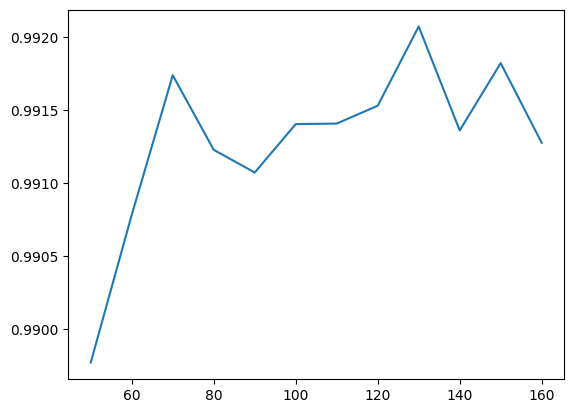

In [37]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

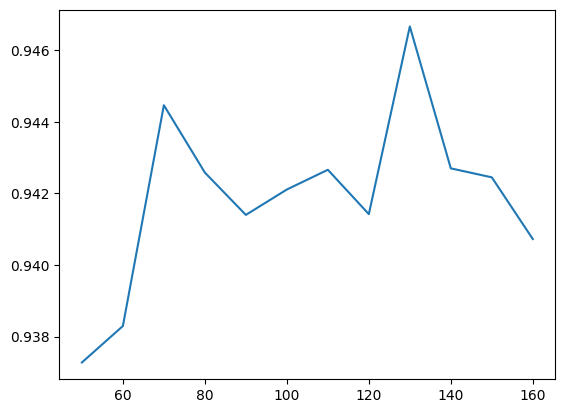

In [38]:

plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [41]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 246475.02
median_absolute_error: 99669.23
r2_score: 0.87


In [43]:

from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [44]:
test_model(gr_80)

mean_absolute_error: 570735.49
median_absolute_error: 353202.34
r2_score: 0.59


In [45]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [46]:
reg = gs.best_estimator_

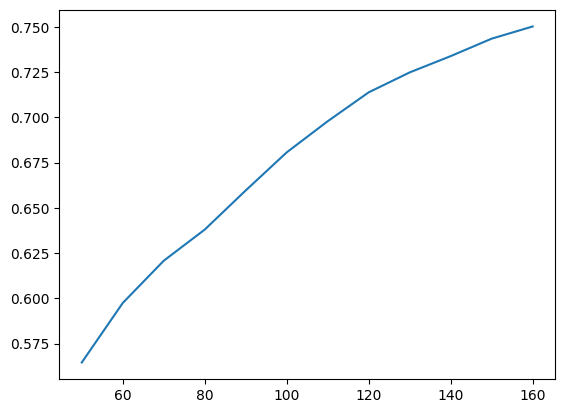

In [47]:

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

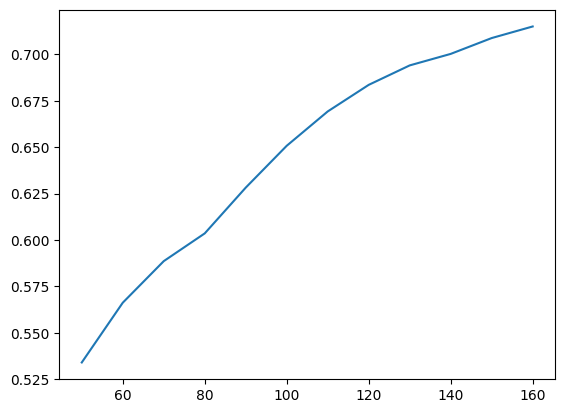

In [48]:

plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [49]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 516143.9
median_absolute_error: 298740.75
r2_score: 0.67
